# TSVM decomposition

This notebook shows how to apply the TSVM decomposition to a PolSARpro NetCDF dataset.

## Import packages and set directories

In [1]:
import os 
from pathlib import Path
import xarray as xr
from polsarpro.io import open_netcdf_beam
from polsarpro.decompositions import tsvm

# optional import for progress bar
from dask.diagnostics import ProgressBar

# change to your data paths
# original dataset
input_alos_data = Path("/data/psp/test_files/SAN_FRANCISCO_ALOS1_slc.nc")
output_dir = Path("/data/psp/res")


## Load data

We load the SNAP NetCDF-BEAM dataset using the `open_netcdf_beam` function. 
To obtain such a dataset, please refer to the "Getting Started" tutorial or the `quickstart-tutorial.ipynb` notebook.

In [2]:
# uncomment to test on S matrix made with SNAP
S = open_netcdf_beam(input_alos_data)

# Variables to compute. A list can be found in the API reference documentation.
# For the sake of illustration we chose the default parameter and one of the per-eigenvalue outputs
flags = ("alpha_phi_tau_psi", "alpha")

## Apply the decomposition

Let's apply the decomposition and write the result to a NetCDF file.
Optionally we can use a progress bar to monitor the progress of the computation.

In [3]:
# change to the name of your liking
file_out = output_dir / "psp_tsvm.nc"

# netcdf writer cannot overwrite
if os.path.isfile(file_out):
    os.remove(file_out)

with ProgressBar():
    tsvm(S, boxcar_size=[7, 7], flags=flags).to_netcdf(file_out)

[########################################] | 100% Completed | 85.30 s


## Display outputs

We open the previously saved dataset:

In [4]:
res = xr.open_dataset(file_out)

Then we may plot individual parameters:

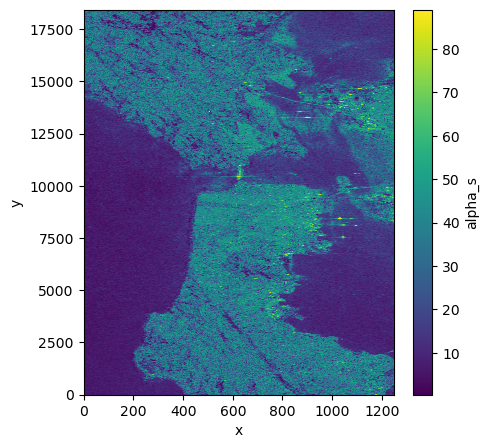

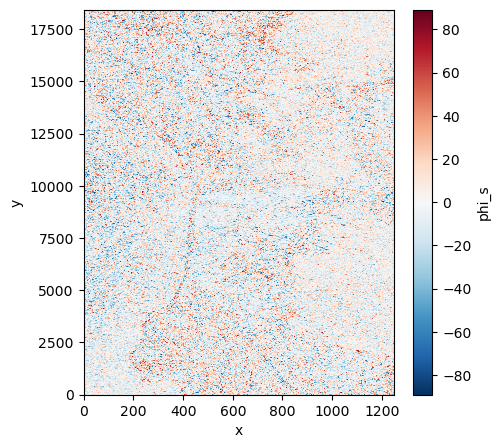

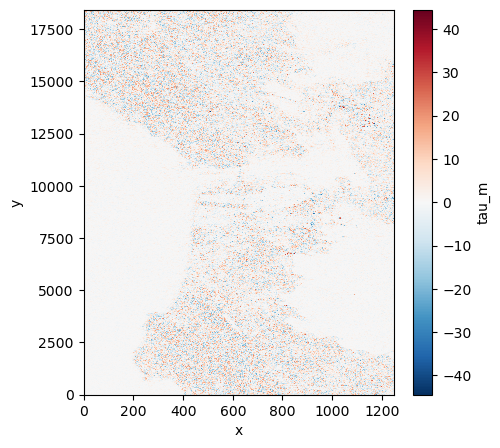

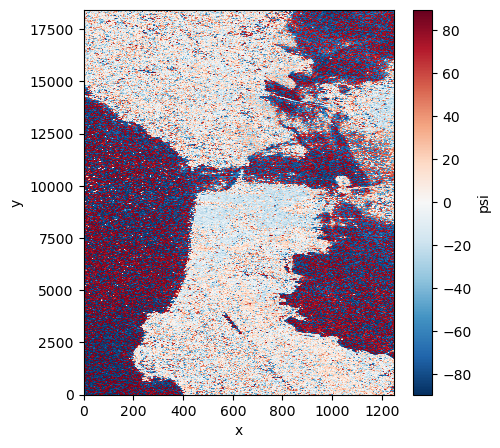

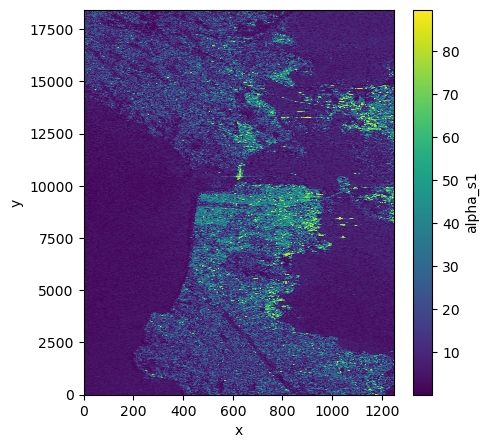

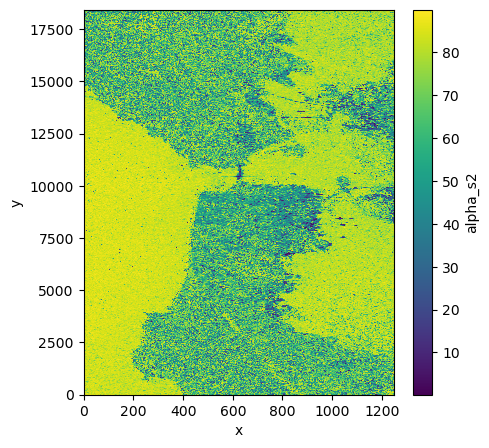

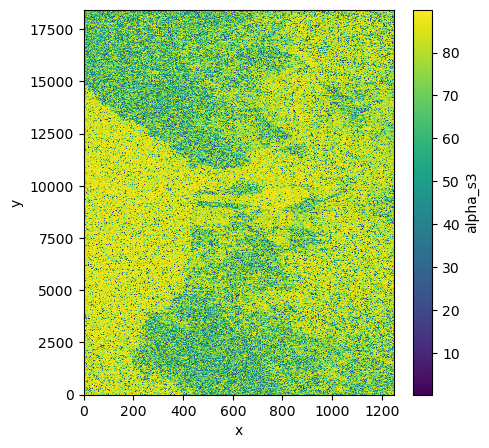

In [5]:
import matplotlib.pyplot as plt
for var in res.data_vars:
    plt.figure(figsize=(5, 5))
    res[var].plot.imshow()